- Continuous: [0, 1], 0.0001, 001 --> measurable
- Discrete: [0, 6] -> 0, 1, 2, 3, 4, 5, 6 --> countable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data = load_boston()

In [3]:
columns = data.get('feature_names')

In [4]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [99]:
df = pd.DataFrame(data.get('data'), columns=columns)
df['label'] = data.get('target')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
label      0
dtype: int64

In [7]:
df.duplicated().sum()

0

**Pearson correlation**

[-1, 1]

-1: absolute negative correlation

1 : absolute positive corraltion

0: No correlation

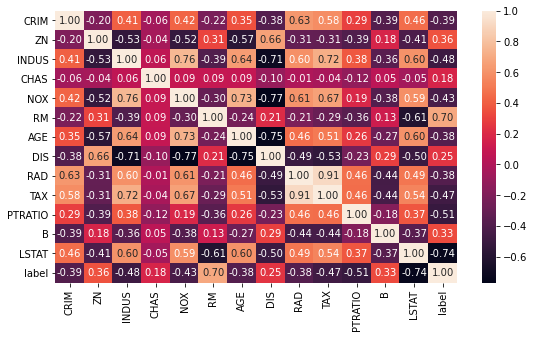

In [8]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [101]:
df_final = df.drop(columns='TAX')

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns='label'), df_final.label, 
                                                   shuffle=True, test_size=0.2)

In [11]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,18.2,395.01,8.16
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,20.2,43.06,23.98
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,17.3,396.90,5.77
177,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,16.6,395.60,6.29
24,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,21.0,394.33,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,18.4,396.90,15.94
239,0.09252,30.0,4.93,0.0,0.428,6.606,42.2,6.1899,6.0,16.6,383.78,7.37
275,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,17.6,396.90,2.98
422,12.04820,0.0,18.10,0.0,0.614,5.648,87.6,1.9512,24.0,20.2,291.55,14.10


In [12]:
y_train

92     22.9
445    11.8
56     24.7
177    24.6
24     15.6
       ... 
317    19.8
239    23.3
275    32.0
422    20.8
98     43.8
Name: label, Length: 404, dtype: float64

![](https://www.machinecurve.com/wp-content/uploads/2020/11/feed-3.jpg)

Generalization

K-fold cross validation

![](https://miro.medium.com/max/640/1*PdwlCactbJf8F8C7sP-3gw.png)

In [13]:
X_train.shape[0] == y_train.shape[0]

True

In [14]:
X_test.shape[0] == y_test.shape[0]

True

In [15]:
X_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,18.2,395.01,8.16
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,20.2,43.06,23.98
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,17.3,396.90,5.77
177,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,16.6,395.60,6.29
24,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,21.0,394.33,16.30


In [16]:
y_train.head(5)

92     22.9
445    11.8
56     24.7
177    24.6
24     15.6
Name: label, dtype: float64

In [17]:
X_test.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,17.8,392.18,8.81
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,19.6,396.90,12.79
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,18.3,395.62,1.98


In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 12), (404,), (102, 12), (102,))

### Modeling

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/CPT-OOP-objects_and_classes.svg/1280px-CPT-OOP-objects_and_classes.svg.png)

#### Sklearn

In [19]:
# Hyperparameters
linear = LinearRegression() # Class linear regression
linear.fit(X_train, y_train)   # training

LinearRegression()

In [20]:
linear  # Model

LinearRegression()

In [21]:
X_test.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,17.8,392.18,8.81
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,19.6,396.90,12.79
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,18.3,395.62,1.98
392,11.57790,0.0,18.10,0.0,0.700,5.036,97.0,1.7700,24.0,20.2,396.90,25.68
112,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,17.8,394.95,16.21


In [22]:
pd.options.display.max_rows = 100

In [23]:
# Compair predicted values vs actual values
pd.DataFrame({'actual': y_test, 'predicted': linear.predict(X_test)}).head(100)

,actual,predicted
90,22.6,27.734903
327,22.2,18.775526
40,34.9,33.877446
392,9.7,10.257147
112,18.8,22.217081
61,16.0,18.351316
237,31.5,32.319868
388,10.2,6.702680
455,14.1,15.295742
153,19.4,17.410652


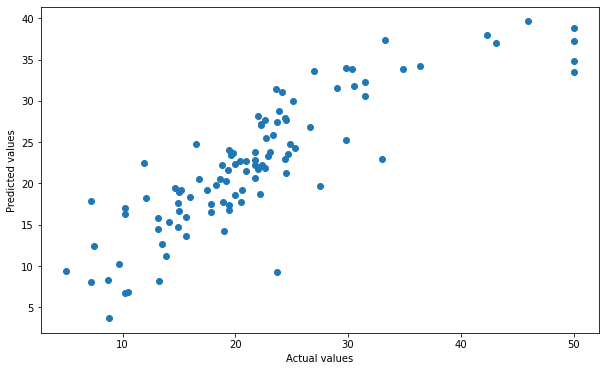

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear.predict(X_test))
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

#### Evaluation

In [25]:
y_predicted = linear.predict(X_test)

In [26]:
y_test.shape, y_predicted.shape

((102,), (102,))

In [27]:
mean_squared_error(y_test, y_predicted)

24.724502507649646

In [28]:
mean_squared_error(y_test, y_predicted, squared=False)

4.972373930794992

In [29]:
mean_absolute_error(y_test, y_predicted)

3.683212534222632

In [30]:
linear.coef_

array([-9.09057265e-02,  4.64545052e-02, -8.11462574e-02,  2.84004899e+00,
       -1.93115571e+01,  3.28218213e+00,  1.49483486e-02, -1.48579020e+00,
        1.41417836e-01, -1.01187253e+00,  9.97633114e-03, -5.80106522e-01])

In [31]:
linear.intercept_

38.930597763794644

In [32]:
y_train.iloc[0] - sum(linear.coef_ * X_train.iloc[0] + linear.intercept_)

-433.2380395873302

In [33]:
loss = 0
for i in range(X_train.shape[0]):
    loss += (y_train.iloc[i] - 
             sum(linear.coef_ * X_train.iloc[i] + linear.intercept_) )**2

loss / (2*X_train.shape[0])

91704.28312086755

In [34]:
X_train.shape[0]

404

In [35]:
np.argmax([1, 2, 3, 4])

3

In [36]:
np.max([1, 2, 3, 4])

4

### Gradient Descent

In [38]:
%config Completer.use_jedi = False

In [42]:
X_train['BIAS'] = 1
X_train.shape

(404, 13)

In [43]:
X_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,BIAS
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,18.2,395.01,8.16,1
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,20.2,43.06,23.98,1


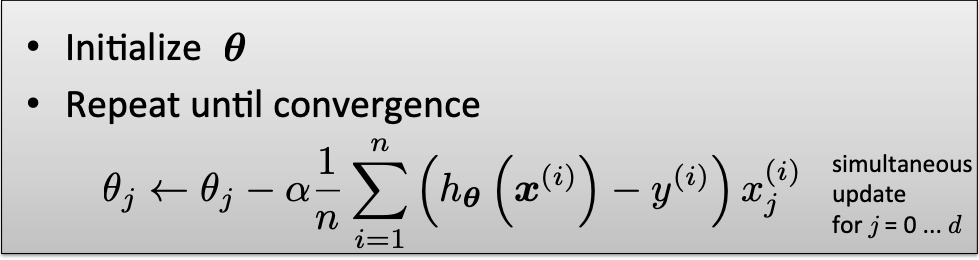

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

In [92]:
theta = np.random.uniform(size=13)
num_loop = 2000
n = X_train.shape[0]
learning_rate = 0.001
e_squared = []

for loop in range(num_loop):
    error = (theta * X_train).sum(axis=1) - y_train
    for i in range(theta.shape[0]):
        theta[i] = theta[i] - learning_rate * (error * X_train.iloc[:, i]).sum() / n
    
    if loop % 100 == 0:
        mse = mean_squared_error(y_train, (theta * X_train).sum(axis=1))
        e_squared.append(mse)
        print(f'MEAN SQUARE ERROR AT {loop}: {mse}')

MEAN SQUARE ERROR AT 0: 478.2555751631256
MEAN SQUARE ERROR AT 100: 346.7814303536088
MEAN SQUARE ERROR AT 200: 262.402571986009
MEAN SQUARE ERROR AT 300: 208.53519978634722
MEAN SQUARE ERROR AT 400: 174.3602188330096
MEAN SQUARE ERROR AT 500: 152.83383038773843
MEAN SQUARE ERROR AT 600: 139.38196447396018
MEAN SQUARE ERROR AT 700: 131.0439958365273
MEAN SQUARE ERROR AT 800: 125.91154379362936
MEAN SQUARE ERROR AT 900: 122.76100250463823
MEAN SQUARE ERROR AT 1000: 120.81319769631516
MEAN SQUARE ERROR AT 1100: 119.57641312820304
MEAN SQUARE ERROR AT 1200: 118.74404955519215
MEAN SQUARE ERROR AT 1300: 118.12805076086119
MEAN SQUARE ERROR AT 1400: 117.61571820267345
MEAN SQUARE ERROR AT 1500: 117.14179734212702
MEAN SQUARE ERROR AT 1600: 116.67051733062148
MEAN SQUARE ERROR AT 1700: 116.1841028109669
MEAN SQUARE ERROR AT 1800: 115.67548188226463
MEAN SQUARE ERROR AT 1900: 115.14370453011652


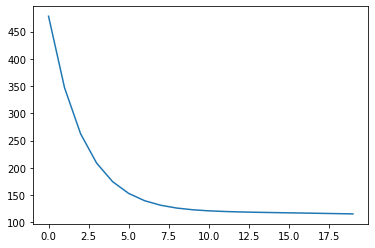

In [93]:
plt.plot(e_squared)
plt.show()

In [94]:
theta

array([0.13245869, 1.75207059, 2.93355207, 0.63399912, 2.5093345 ,
       5.36177973, 5.70475886, 3.0340402 , 2.15649589, 5.87688186,
       9.21465027, 2.79285559, 0.88494288])

In [ ]:
X_test, y_test

In [86]:
X_test['BIAS'] = 1

In [ ]:
model = theta * X_test

In [95]:
predicted = (theta * X_test).sum(axis=1)

In [96]:
mean_squared_error(y_test, predicted)

15276484.113644006

In [97]:
mean_absolute_error(y_test, predicted)

3790.179711380691

![](https://datalya.com/blog/content/4-machine-learning/11-machine-learning-vs-traditional-programming-paradigm/ml_vs_traditional_paradigm.png)

### Normalization

#### Simple normalization

$$X_{i} = \frac{X_i}{\text{max{X_i}}}$$

MinMaxScaler

![](https://cdn.wallstreetmojo.com/wp-content/uploads/2019/04/Normalization-Formula.jpg)

#### Standardization

![](https://www.oreilly.com/library/view/hands-on-machine-learning/9781788393485/assets/7a9d8cb9-10f7-43b5-b52f-865fbbb0b69e.png)

In [103]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
81,0.04462,25.0,4.86,0.0,0.426,6.619,70.4,5.4007,4.0,19.0,395.63,7.22
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,14.7,389.61,1.92
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,17.4,387.38,3.13
449,7.52601,0.0,18.10,0.0,0.713,6.417,98.3,2.1850,24.0,20.2,304.21,19.31
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24.0,20.2,374.68,11.66
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,16.1,396.90,10.24
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,21.0,386.75,14.67
453,8.24809,0.0,18.10,0.0,0.713,7.393,99.3,2.4527,24.0,20.2,375.87,16.74
248,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,19.1,374.71,9.52


In [104]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [107]:
minmax = MinMaxScaler()
pd.DataFrame(minmax.fit_transform(X_train), columns=X_train.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.000430,0.25,0.161290,0.0,0.084362,0.585936,0.695160,0.445802,0.130435,0.680851,0.996798,0.151490
1,0.020540,0.00,0.700880,1.0,0.452675,0.812608,0.981462,0.095097,0.173913,0.223404,0.981618,0.005243
2,0.004224,0.00,0.210411,0.0,0.244856,0.858210,0.860968,0.217740,0.304348,0.510638,0.975995,0.038631
3,0.084520,0.00,0.646628,0.0,0.674897,0.547231,0.982492,0.110159,1.000000,0.808511,0.766277,0.485099
4,0.052159,0.00,0.646628,0.0,0.471193,0.655106,0.666323,0.146472,1.000000,0.808511,0.943971,0.274007
...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.000421,0.80,0.106672,0.0,0.026749,0.426518,0.290422,0.572182,0.130435,0.372340,1.000000,0.234823
400,0.008743,0.00,0.281525,0.0,0.314815,0.465415,0.811535,0.326521,0.130435,0.893617,0.974406,0.357064
401,0.092636,0.00,0.646628,0.0,0.674897,0.734240,0.992791,0.138101,1.000000,0.808511,0.946972,0.414183
402,0.001777,0.22,0.197947,0.0,0.094650,0.550297,0.475798,0.698999,0.260870,0.691489,0.944047,0.214956


In [108]:
standard = StandardScaler()
pd.DataFrame(standard.fit_transform(X_train), columns=X_train.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,-0.411435,0.592822,-0.898143,-0.288288,-1.076278,0.479422,0.067937,0.785843,-0.639715,0.268099,0.436617,-0.769453
1,-0.218989,-0.486202,1.252104,3.468755,0.441110,2.130925,1.053739,-0.856207,-0.525561,-1.760394,0.370784,-1.509032
2,-0.375131,-0.486202,-0.702401,-0.288288,-0.415070,2.463180,0.638851,-0.281978,-0.183099,-0.486689,0.346397,-1.340185
3,0.393283,-0.486202,1.035911,-0.288288,1.356628,0.197424,1.057285,-0.785686,1.643366,0.834191,-0.563128,0.917625
4,0.083597,-0.486202,1.035911,-0.288288,0.517403,0.983389,-0.031353,-0.615666,1.643366,0.834191,0.207513,-0.149881
...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.411524,2.966676,-1.115797,-0.288288,-1.313635,-0.682075,-1.325661,1.377567,-0.639715,-1.099954,0.450505,-0.348033
400,-0.331884,-0.486202,-0.419012,-0.288288,-0.126851,-0.398681,0.468640,0.227351,-0.639715,1.211585,0.339508,0.270144
401,0.470952,-0.486202,1.035911,-0.288288,1.356628,1.559949,1.092745,-0.654860,1.643366,0.834191,0.220527,0.558999
402,-0.398552,0.463340,-0.752067,-0.288288,-1.033893,0.219761,-0.687372,1.971344,-0.297253,0.315274,0.207841,-0.448504
